### 경희대학교 산업경영공학과 2015100915 김태호

# LOL 플레이어의 실력 분석

BeautifulSoup와 urllib, selenium을 사용하여 플레이어의 데이터가 있는 op.gg에서 데이터를 가져와 LOL플레이어의 최근 100경기의 데이터 분석한다.

### 사용방법
1. 상단의 'Togle Toolbar'에 '>>'모양의 버튼을 누르고 빨간버튼(Restart the kernel)을 눌러주세요.
2. 아래에 "소환사명을 입력해주세요.: "가 나오면 소환사명을 입력해 주세요.(ex. 황토매트)

In [1]:
username = input("소환사명을 입력해주세요.: ")

소환사명을 입력해주세요.: 황토매트


In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
import seaborn as sns
from selenium import webdriver
import urllib.request
import urllib.parse
import time

In [3]:
url1 = "http://www.op.gg/summoner/userName=" #한글을 제외한 주소를 url1에 저장
#parse모듈을 사용해 한글부분을 유니코드로 치환
url2 = urllib.parse.quote_plus(str(username)) 
url = url1 + url2
driver = webdriver.Chrome('chromedriver.exe')
driver.get(url)

In [4]:
xpath = """//*[@id="SummonerRefreshButton"]"""
driver.find_element_by_xpath(xpath).click()

time.sleep(10)

In [5]:
while True:
    try:
        xpath = """//*[@id="SummonerLayoutContent"]/div[2]/div[2]/div/div[2]/div[4]/a"""
        driver.find_element_by_xpath(xpath).click()
        break
    except:
        continue
while True:
    try:
        xpath = """//*[@id="SummonerLayoutContent"]/div[2]/div[2]/div/div[2]/div[5]/a"""
        driver.find_element_by_xpath(xpath).click()
        break
    except:
        continue
while True:
    try:
        xpath = """//*[@id="SummonerLayoutContent"]/div[2]/div[2]/div/div[2]/div[6]/a"""
        driver.find_element_by_xpath(xpath).click()
        break
    except:
        continue
while True:
    try:
        xpath = """//*[@id="SummonerLayoutContent"]/div[2]/div[2]/div/div[2]/div[7]/a"""
        driver.find_element_by_xpath(xpath).click()
        break
    except:
        continue
        
time.sleep(10)

In [6]:
page = driver.page_source
soup = BeautifulSoup(page, "html.parser")

print(soup.prettify())

<!DOCTYPE html>
<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html class=" js localstorage" lang="ko_KR" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="황토매트 - 게임 전적 - League of Legends" name="title"/>
  <meta content="황토매트 - 게임 전적 - League of Legends" property="og:title"/>
  <meta content="황토매트 / Bronze 2 15LP / 14승 12패 승률 54% / 아리 - 12승 8패 승률 60%, 징크스 - 4승 8패 승률 33%, 오른 - 3승 6패 승률 33%, 레오나 - 4승 1패 승률 80%, 트리스타나 - 2승 3패 승률 40%" name="description"/>
  <meta content="황토매트 / Bronze 2 15LP / 14승 12패 

</html>


## 랭크게임 티어와 랭킹알아보기

In [7]:
import re #정규식
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" # all 이면 여러개를 출력할 수 있도록 해줌

In [8]:
TierImage = soup.find('div','Medal').find('img','Image')
TierImage = TierImage['src']
TierImage = "https:" + TierImage
soup.find('div','Medal') #티어 이미지

<div class="Medal tip" title="솔랭">
<img class="Image" src="//opgg-static.akamaized.net/images/medals/bronze_2.png"/>
</div>

In [9]:
try:
    soup.find('div','LadderRank') #래더 랭크
    LadderRank = soup.find('div','LadderRank').get_text()
    LadderRank = re.split(('\n|\t'), LadderRank)
    LadderRank = "".join(LadderRank)
except:
    LadderRank = '랭크기록이 없습니다.'

<div class="LadderRank">
<a class="tip Link" href="/ranking/ladder/summonerName=%ED%99%A9%ED%86%A0%EB%A7%A4%ED%8A%B8" target="_blank" title="래더 랭킹 목록에서 보기">
						래더 랭킹 <span class="ranking">713,407</span>위 (상위 87%)
					</a>
</div>

In [10]:
soup.find('div','SummonerRatingMedium') #랭크게임 정보
SummonerRatingMedium = soup.find('div','SummonerRatingMedium').get_text()
SummonerRatingMedium = re.split(('\n|\t'), SummonerRatingMedium)
SummonerRatingMedium = " ".join(SummonerRatingMedium)

<div class="SummonerRatingMedium">
<div class="Medal tip" title="솔랭">
<img class="Image" src="//opgg-static.akamaized.net/images/medals/bronze_2.png"/>
</div>
<div class="TierRankInfo">
<div class="RankType">솔로랭크</div>
<div class="Position">
<b>미드</b> 총 26게임
			</div>
<div class="TierRank">Bronze 2</div>
<div class="TierInfo">
<span class="LeaguePoints">
				15 LP
			</span>
							/
						<span class="WinLose">
<span class="wins">14승</span>
<span class="losses">12패</span>
<br/>
<span class="winratio">승률 54%</span>
</span>
</div>
<div class="LeagueName">
</div>
</div>
</div>

In [11]:
from IPython.display import Image
from IPython.core.display import HTML #이미지 출력
Image(url= TierImage)
username
LadderRank
SummonerRatingMedium

'황토매트'

'래더 랭킹 713,407위 (상위 87%)'

'     솔로랭크  미드 총 26게임     Bronze 2       15 LP            /        14승 12패  승률 54%      '

## 모스트 챔피언 분석하기

In [12]:
soup.find('div','MostChampionContent')

<div class="MostChampionContent tabItem overview-stats--all" style="display: block;">
<div class="MostChampionContent" data-last-info="7" data-season="13" data-summoner-id="1221663">
<div class="ChampionBox Ranked">
<div class="Face" title="아리">
<a href="/champion/ahri/statistics" target="_blank">
<img alt="아리" class="ChampionImage" src="//opgg-static.akamaized.net/images/lol/champion/Ahri.png?image=w_45&amp;v=15354684000" width="45"/>
</a>
</div>
<div class="ChampionInfo">
<div class="ChampionName" title="아리">
<a href="/champion/ahri/statistics" target="_blank">
					아리
				</a>
</div>
<div class="ChampionMinionKill tip" title="평균 CS (CS/분)">
									CS 134.5 (4.6)
							</div>
</div>
<div class="PersonalKDA">
<div class="KDA green tip" title="(K 7.4 + A 8.85) / D 4.9">
<span class="KDA">3.32:1</span>
<span class="Text">평점</span>
</div>
<div class="KDAEach">
<span class="Kill">7.4</span>
<span class="Bar">/</span>
<span class="Death">4.9</span>
<span class="Bar">/</span>
<span class

In [13]:
Champ = [] ; CS = [] ; KDARatio = [] ; tmp = [] ; K = [] ; D = [] ; A = [] ; WinRatio = [] ; PlayedGames = []
span = ['Kill','Death','Assist','KDA']
dict_tmp = {'ChampionName':Champ,'ChampionMinionKill':CS,'KDA':KDARatio,'Kill':K,'Death':D,'Assist':A, 
            'WinRatio':WinRatio,'Title':PlayedGames}

for x,y in dict_tmp.items():
    if x in span:
        tmp = soup.find('div','MostChampionContent').find_all('span',x)
    else:
        tmp = soup.find('div','MostChampionContent').find_all('div',x)
    for i in tmp:
        tmp = re.split(('\n|\t'),i.get_text())
        tmp = [n for n in tmp if n][0]
        y.append(tmp)
    y

['아리', '징크스', '오른', '레오나', '트리스타나', '카시오페아', '시비르']

['CS 134.5 (4.6)',
 'CS 169.3 (5.6)',
 'CS 141.4 (4.7)',
 'CS 48.8 (2.0)',
 'CS 129.0 (5.1)',
 'CS 182.8 (7.1)',
 'CS 234.3 (7.1)']

['3.32:1', '2.79:1', '3.18:1', '5.83:1', '1.74:1', '2.91:1', '3.00:1']

['7.4', '5.7', '4.4', '2.2', '4.4', '8.0', '5.0']

['4.9', '4.8', '4.2', '2.4', '5.4', '4.6', '4.3']

['8.9', '7.6', '9.0', '11.8', '5.0', '5.4', '8.0']

['60%', '33%', '33%', '80%', '40%', '40%', '33%']

['20 게임', '12 게임', '9 게임', '5 게임', '5 게임', '5 게임', '3 게임']

In [14]:
InteractiveShell.ast_node_interactivity = "last" 

MostChampionContent_df = {'Champ':Champ, 'CS':CS, 'KDARatio':KDARatio, 'K':K,'D':D,'A':A
                          , 'WinRatio':WinRatio, 'PlayedGames':PlayedGames}
MCC_df = pd.DataFrame(MostChampionContent_df)
MCC_df.set_index('Champ',inplace=True)
print('가장 많이 플레이한 챔피언')
MCC_df

가장 많이 플레이한 챔피언


,CS,KDARatio,K,D,A,WinRatio,PlayedGames
Champ,,,,,,,
아리,CS 134.5 (4.6),3.32:1,7.4,4.9,8.9,60%,20 게임
징크스,CS 169.3 (5.6),2.79:1,5.7,4.8,7.6,33%,12 게임
오른,CS 141.4 (4.7),3.18:1,4.4,4.2,9.0,33%,9 게임
레오나,CS 48.8 (2.0),5.83:1,2.2,2.4,11.8,80%,5 게임
트리스타나,CS 129.0 (5.1),1.74:1,4.4,5.4,5.0,40%,5 게임
카시오페아,CS 182.8 (7.1),2.91:1,8.0,4.6,5.4,40%,5 게임
시비르,CS 234.3 (7.1),3.00:1,5.0,4.3,8.0,33%,3 게임


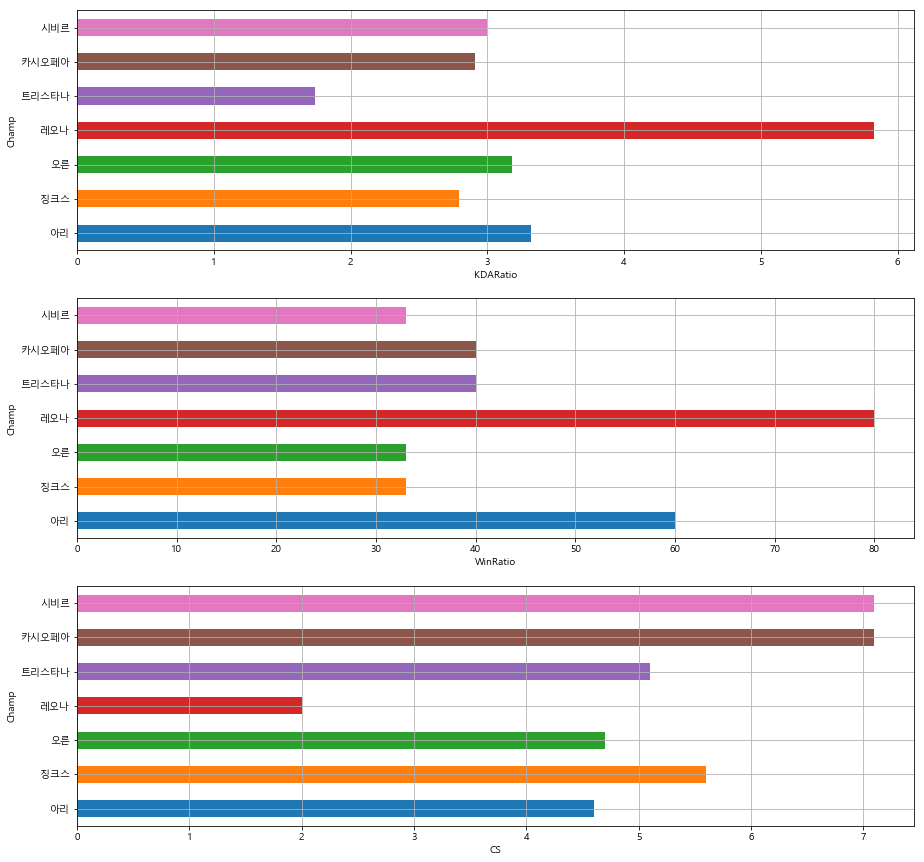

In [15]:
KDARatio_fl = [] ; WinRatio_fl = []
for i in KDARatio:
    tmp = re.split((':1|%'),i)
    tmp = [n for n in tmp if n][0]
    KDARatio_fl.append(tmp)
for i in WinRatio:
    tmp = re.split((':1|%'),i)
    tmp = [n for n in tmp if n][0]
    WinRatio_fl.append(tmp)
CS_new = []
n = 0
while n < len(list(MCC_df.index)):
    sw = 0
    k = ''
    tmp = MCC_df['CS'][n]
    for i in tmp:
        if i == '(':
            sw = 1
        if sw == 1:
            k += i
    CS_new.append(k.strip('(|)'))
    n += 1

ForGragh = {'Champ':Champ,'CS':CS_new,'KDARatio':KDARatio_fl, 'WinRatio':WinRatio_fl}
ForGragh = pd.DataFrame(ForGragh)
ForGragh['KDARatio'] = ForGragh['KDARatio'].astype(float)
ForGragh['WinRatio'] = ForGragh['WinRatio'].astype(float)
ForGragh['CS'] = ForGragh['CS'].astype(float)
ForGragh = ForGragh.set_index('Champ')
plt.figure()
plt.subplot(311)
ForGragh['KDARatio'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('KDARatio')
plt.subplot(312)
ForGragh['WinRatio'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('WinRatio')
plt.subplot(313)
ForGragh['CS'].plot(kind='barh', grid=True, figsize=(15,15))
plt.xlabel('CS')
plt.show()

## 최근 100경기 분석하기

In [16]:
soup.find('div','GameItemList').find_all('div','GameItemWrap')

[<div class="GameItemWrap">
 <div class="GameItem Win " data-game-id="3528506167" data-game-result="win" data-game-time="1549298778" data-summoner-id="1221663">
 <div class="Content">
 <div class="GameStats">
 <div class="GameType">
 					솔랭
 				</div>
 <div class="TimeStamp"><span class="_timeago _timeCountAssigned tip" data-datetime="1549298778" data-interval="60" data-type="" title="2019년 2월 5일 오전 1시 46분">23분 전</span></div>
 <div class="Bar"></div>
 <div class="GameResult">
 											승리									</div>
 <div class="GameLength">29분 21초</div>
 </div>
 <div class="GameSettingInfo">
 <div class="ChampionImage">
 <a href="/champion/cassiopeia/statistics" target="_blank"><img alt="카시오페아" class="Image" src="//opgg-static.akamaized.net/images/lol/champion/Cassiopeia.png?image=w_46&amp;v=15354684000"/></a>
 </div>
 <div class="SummonerSpell">
 <div class="Spell">
 <img alt="정화" class="Image tip" src="//opgg-static.akamaized.net/images/lol/spell/SummonerBoost.png?image=w_22&amp;v=1535468400

In [17]:
Champ = [] ; GameType = [] ; CS = [] ; KDARatio_ = [] ; tmp = [] ; K = [] ; D = [] ; A = [] 
CKRate_ = [] ; GameResult = [] 
span = ['Kill','Death','Assist','KDARatio','CS','Wards']
dict_tmp = {'ChampionName':Champ,'GameType':GameType,'CS':CS,'KDARatio':KDARatio_,'Kill':K,'Death':D,'Assist':A, 
            'CKRate' : CKRate_,'GameResult':GameResult}

for x,y in dict_tmp.items():
    if x in span:
        tmp = soup.find('div','RealContent').find_all('span',x)
    else:
        tmp = soup.find('div','RealContent').find_all('div',x)
    for i in tmp:
        tmp = re.split(('\n|\t'),i.get_text())
        tmp = [n for n in tmp if n][0]
        y.append(tmp)
tmp = []
for i in K:
    if i < '9999999':
        tmp.append(i)
K = tmp        
KDARatio_ = KDARatio_[1:]
K = K[1:]
D = D[1:]
A = A[1:]

In [18]:
Recent_Games = {'ChampionName':Champ,'GameType':GameType,'CS':CS,'KDARatio':KDARatio_,'K':K,
                          'D':D,'A':A, 'CKRate' : CKRate_,'GameResult':GameResult}
Recent_Games = pd.DataFrame(Recent_Games)
Recent_Games.set_index('ChampionName',inplace=True)
print('최근 100경기')
Recent_Games

최근 100경기


,GameType,CS,KDARatio,K,D,A,CKRate,GameResult
ChampionName,,,,,,,,
카시오페아,솔랭,186 (6.3),3.80:1,7,5,12,킬관여 54%,승리
카시오페아,솔랭,171 (8.5),Perfect,6,0,4,킬관여 56%,승리
라이즈,솔랭,288 (8.2),4.67:1,13,3,1,킬관여 67%,패배
라이즈,솔랭,236 (6.6),6.00:1,22,6,14,킬관여 73%,승리
카시오페아,솔랭,132 (6.5),1.60:1,6,5,2,킬관여 67%,패배
카시오페아,솔랭,219 (7.6),2.17:1,11,6,2,킬관여 76%,패배
카시오페아,솔랭,206 (6.9),2.43:1,10,7,7,킬관여 71%,패배
아리,솔랭,132 (3.7),3.14:1,9,7,13,킬관여 54%,승리
아리,솔랭,168 (4.5),2.17:1,3,6,10,킬관여 72%,패배


In [19]:
# 분석하기 쉽게 전처리
CS_min = []
n = 0
while n < len(list(Recent_Games.index)):
    sw = 0
    k = ''
    tmp = CS[n]
    for i in tmp:
        if i == '(':
            sw = 1
        if sw == 1:
            k += i
    CS_min.append(k.strip('(|)'))
    n += 1
KDARatio = []
for i in KDARatio_:
    tmp = re.split((':1'),i)
    KDARatio.append(tmp[0])
CKRate = []
for i in CKRate_:
    tmp = re.split(('%|킬관여 '),i)
    CKRate.append(tmp[1])

In [20]:
Recent_Games2 = {'ChampionName':Champ,'GameType':GameType,'CS_min':CS_min,'KDARatio':KDARatio,'K':K,
                          'D':D,'A':A, 'CKRate' : CKRate,'GameResult':GameResult}
Recent_Games2 = pd.DataFrame(Recent_Games2)
Recent_Games2.set_index('ChampionName',inplace=True)

Recent_Games2['CS_min'] =Recent_Games2['CS_min'].astype(float) 
Recent_Games2['CKRate'] =Recent_Games2['CKRate'].astype(float) 
Recent_Games2['K'] =Recent_Games2['K'].astype(float) 
Recent_Games2['D'] =Recent_Games2['D'].astype(float) 
Recent_Games2['A'] =Recent_Games2['A'].astype(float) 
#Recent_Games2 = Recent_Games2[Recent_Games2['GameResult'] != '다시하기']

Recent_Games2

,GameType,CS_min,KDARatio,K,D,A,CKRate,GameResult
ChampionName,,,,,,,,
카시오페아,솔랭,6.3,3.80,7.0,5.0,12.0,54.0,승리
카시오페아,솔랭,8.5,Perfect,6.0,0.0,4.0,56.0,승리
라이즈,솔랭,8.2,4.67,13.0,3.0,1.0,67.0,패배
라이즈,솔랭,6.6,6.00,22.0,6.0,14.0,73.0,승리
카시오페아,솔랭,6.5,1.60,6.0,5.0,2.0,67.0,패배
카시오페아,솔랭,7.6,2.17,11.0,6.0,2.0,76.0,패배
카시오페아,솔랭,6.9,2.43,10.0,7.0,7.0,71.0,패배
아리,솔랭,3.7,3.14,9.0,7.0,13.0,54.0,승리
아리,솔랭,4.5,2.17,3.0,6.0,10.0,72.0,패배


100경기 평균 기록

In [21]:
Total_vic = list(Recent_Games2['GameResult']).count('승리')
Total_def = list(Recent_Games2['GameResult']).count('패배')
Total_wr = Total_vic/(Total_vic+Total_def)*100

Total_wr = round(Total_wr,2)
Total_KDA = round((Recent_Games2['K'].sum()+Recent_Games2['A'].sum())/Recent_Games2['D'].sum(),2)
Total_cs = round(Recent_Games2['CS_min'].mean(),2)
Total_CKRate = round(Recent_Games2['CKRate'].mean(),2)
print("최근 100경기 승률은 {}%이고 평점은 {}점이다. 한 경기당 분당CS는 {}개이고 평균 킬관여율은 {}%이다."
      .format(Total_wr,Total_KDA,Total_cs,Total_CKRate))

최근 100경기 승률은 52.08%이고 평점은 2.98점이다. 한 경기당 분당CS는 4.93개이고 평균 킬관여율은 49.86%이다.


챔피언별 기록

In [22]:
grouped = Recent_Games2[['CS_min','K','D','A','CKRate']].groupby(level = 0) 
Recent_Games3 = grouped.mean()
Recent_Games3['KDA'] = (Recent_Games3['K']+Recent_Games3['A'])/Recent_Games3['D']
Recent_Games3 = Recent_Games3.applymap(lambda x : round(x,2)) 
Recent_Games3['PlayedGames'] = grouped.count()['CS_min']

In [23]:
# GameResult 와 index를 key로 만든후 카운트 한다.
grouped2 = Recent_Games2[['K']].groupby([Recent_Games2.index,Recent_Games2['GameResult']]) 
grouped3 = grouped2.count()

WinRatio = []
for tmp in Recent_Games3.index:
    try:
        grouped_vic = grouped3.loc[(tmp,'승리'), 'K'] 
    except:
        grouped_vic = 0
    try:
        grouped_def = grouped3.loc[(tmp,'패배'), 'K'] 
    except:
        grouped_def = 0
    grouped_wr = grouped_vic/(grouped_vic+grouped_def)*100
    grouped_wr = round(grouped_wr,2)
    WinRatio.append(grouped_wr)

In [24]:
Recent_Games3['WinRatio'] = WinRatio
Recent_Games3

,CS_min,K,D,A,CKRate,KDA,PlayedGames,WinRatio
ChampionName,,,,,,,,
노틸러스,6.50,3.00,1.00,9.00,32.00,12.00,1,100.00
라이즈,7.40,17.50,4.50,7.50,70.00,5.56,2,50.00
레오나,2.08,2.20,2.40,11.80,52.60,5.83,5,80.00
리 신,4.70,8.00,10.00,9.00,63.00,1.70,1,0.00
베인,6.05,14.00,7.50,8.00,49.00,2.93,2,100.00
브라움,2.00,2.00,9.50,16.50,53.00,1.95,2,50.00
소나,0.20,0.00,2.00,1.00,17.00,0.50,1,0.00
소라카,0.00,0.00,4.00,0.00,0.00,0.00,1,0.00
시비르,6.65,6.00,4.12,9.38,53.75,3.73,8,62.50


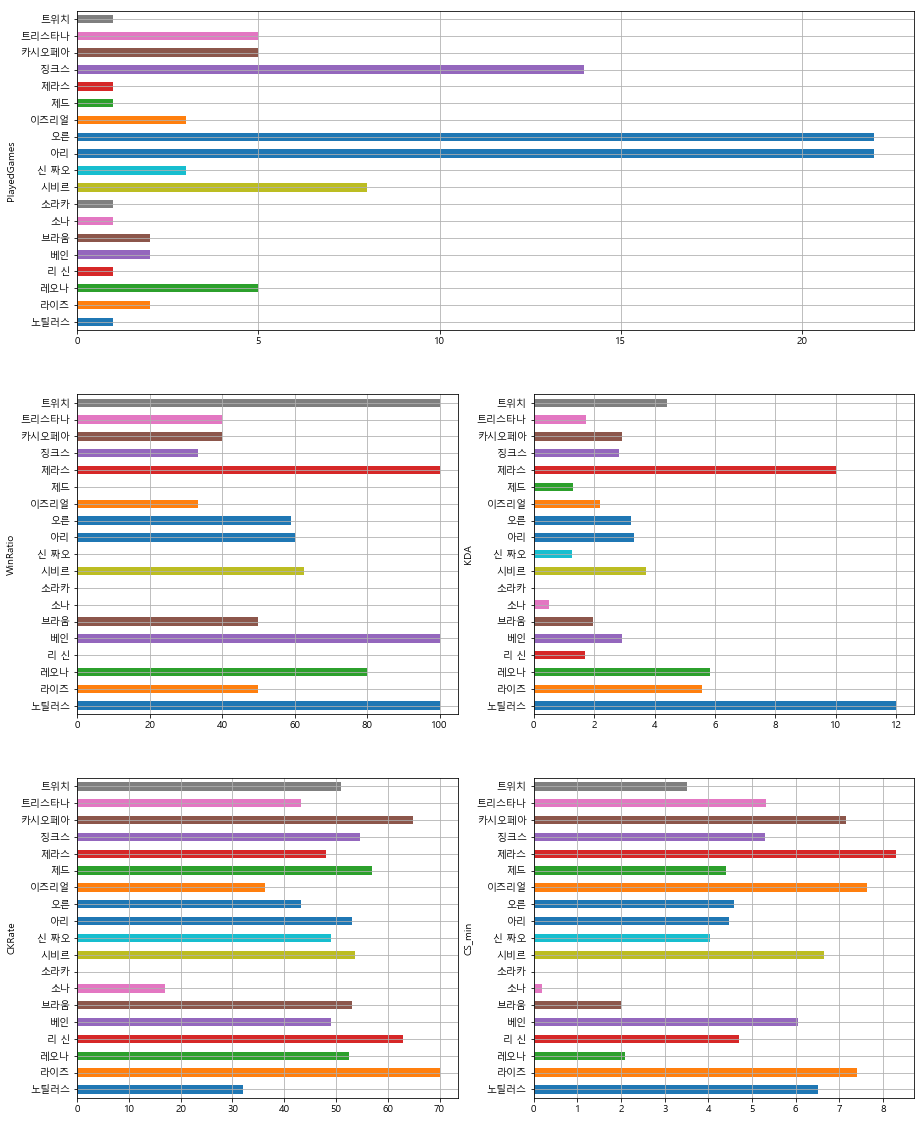

In [25]:
plt.figure()
plt.subplot(311)
Recent_Games3['PlayedGames'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('PlayedGames')
plt.subplot(323)
Recent_Games3['WinRatio'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('WinRatio')
plt.subplot(324)
Recent_Games3['KDA'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('KDA')
plt.subplot(325)
Recent_Games3['CKRate'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('CKRate')
plt.subplot(326)
Recent_Games3['CS_min'].plot(kind='barh', grid=True, figsize=(15,20))
plt.ylabel('CS_min')
plt.show()

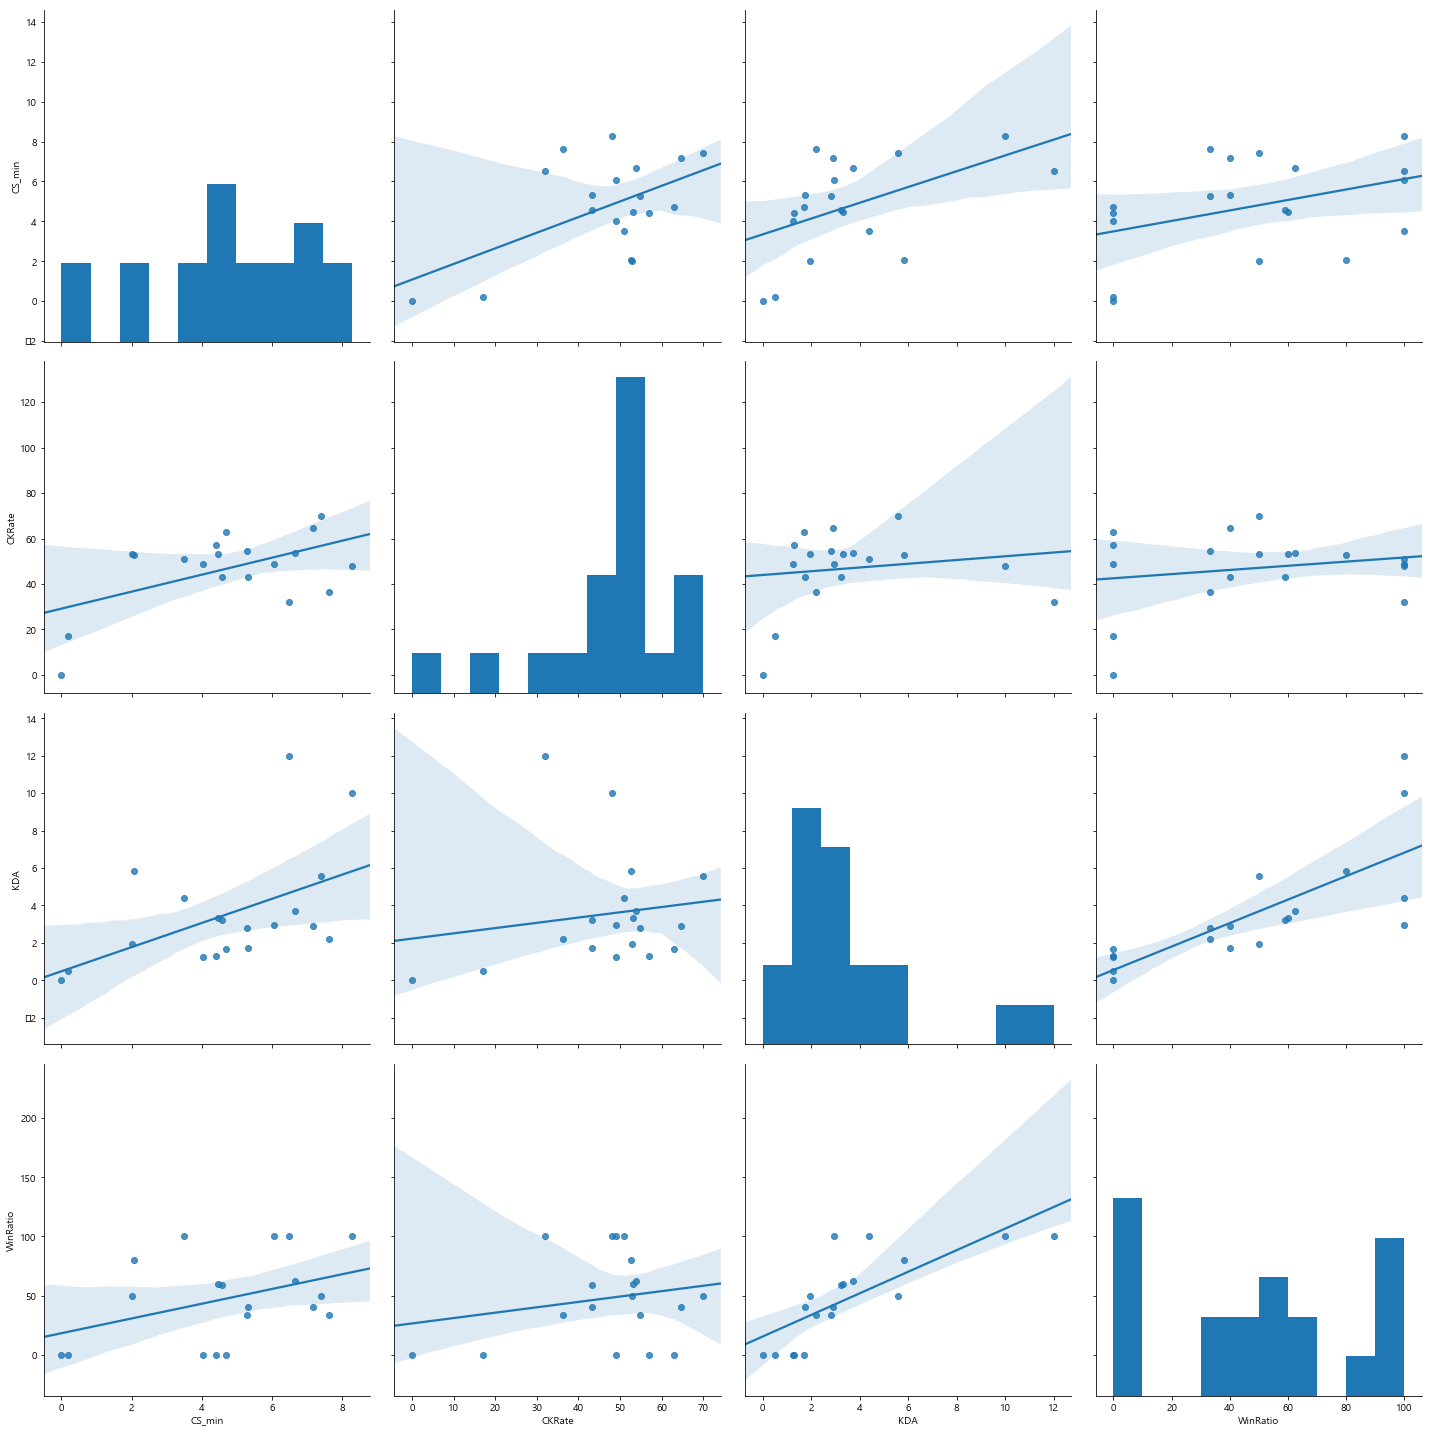

In [26]:
sns.pairplot(Recent_Games3[Recent_Games3['KDA'] != np.inf], vars=["CS_min", "CKRate", "KDA",'WinRatio'], kind='reg', size=5)
plt.show()